In [188]:
################################    Imports    ###################################

import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

from sklearn import datasets, cluster
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
%matplotlib inline

diabetesDataset = fetch_ucirepo(id=296)
hrData = pd.read_csv("data/HRDataset_v14.csv", sep=',', low_memory=False)
circlesData = datasets.make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=30)

/opt/homebrew/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [224]:
labelEncoder = LabelEncoder()
imputer = SimpleImputer()
ms = MinMaxScaler()
################################    Prepare small dataset    ###################################

hrDataCopy = hrData.drop(['Salary','Employee_Name', 'EmpID', 'Position', 'State', 'Zip', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'DateofHire', 'RaceDesc', 'DateofTermination', 'Department', 'EmploymentStatus', 'ManagerName', 'LastPerformanceReview_Date'], axis="columns")

hrX = hrDataCopy['EngagementSurvey']
hrY = hrDataCopy['DOB']

hrY = labelEncoder.fit_transform(hrY)

hrXY = list(zip(hrX, hrY))

################################    Prepare big dataset    ######################################

diaFeatures = diabetesDataset.data.features
diaTargets = diabetesDataset.data.targets

diaXlabel = 'num_medications'
diaYlabel = 'num_lab_procedures'
diaX = diaFeatures[diaXlabel]
diaY = diaFeatures[diaYlabel]

diaX = labelEncoder.fit_transform(diaX)
diaY = labelEncoder.fit_transform(diaY)

diaXY = diaX, diaY
diaXY = list(zip(diaX, diaY))
################################ Prepare sklearn circles dataset ################################

circlesX, circlesY = circlesData

# len(hrData['PerfScoreID'].unique())

# K-Means

### Elbow Method

mit der Elbow Method lässt sich herausfinden, wie viele Cluster für die Daten ideal sind.

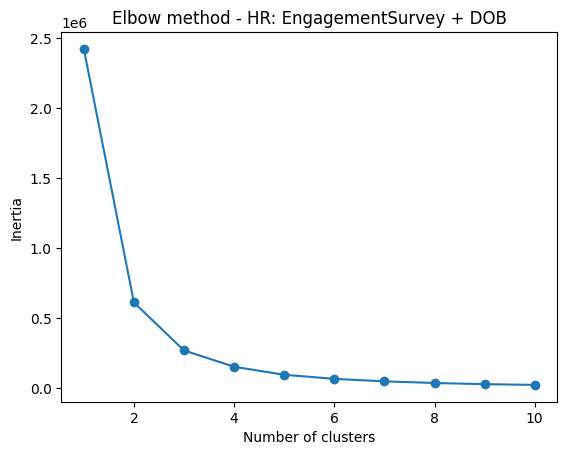

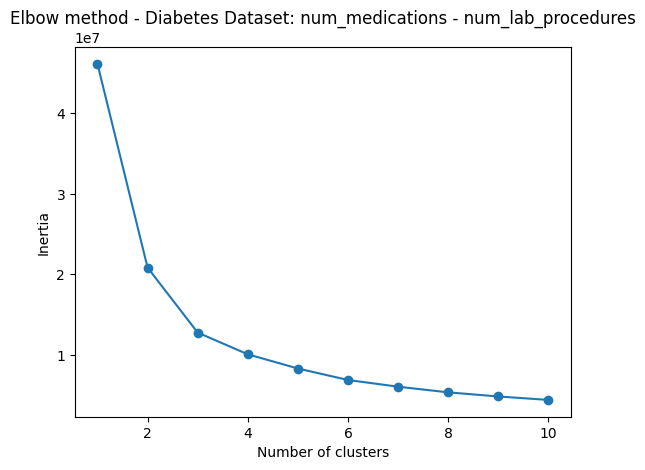

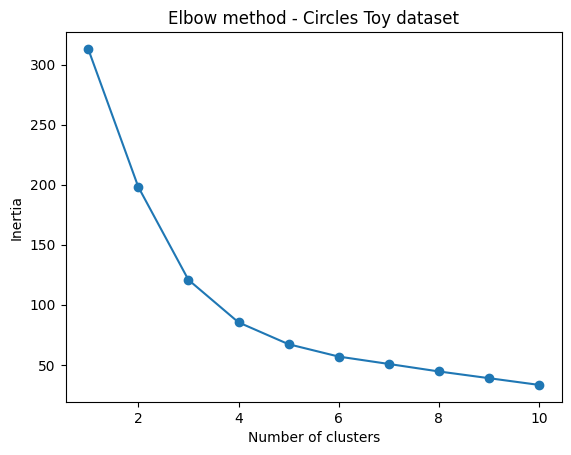

In [225]:
inertias = []

for i in range(1,11):
    kmeansTest = cluster.KMeans(n_clusters=i, n_init=10)
    kmeansTest.fit(hrXY)
    inertias.append(kmeansTest.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method - HR: EngagementSurvey + DOB')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


inertiasDia = []

for i in range(1,11):
    kmeansTest = cluster.KMeans(n_clusters=i, n_init=10)
    kmeansTest.fit(diaXY)
    inertiasDia.append(kmeansTest.inertia_)

plt.plot(range(1,11), inertiasDia, marker='o')
plt.title('Elbow method - Diabetes Dataset: ' + diaXlabel + " - " + diaYlabel)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

inertiasCircles = []

for i in range(1,11):
    kmeansTest = cluster.KMeans(n_clusters=i, n_init=10)
    kmeansTest.fit(circlesX)
    inertiasCircles.append(kmeansTest.inertia_)

plt.plot(range(1,11), inertiasCircles, marker='o')
plt.title('Elbow method - Circles Toy dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



an dem Punkt, wo der "Elbow" der Anzahl der Cluster ist, also wo die Punkte beginnen, linear abzufallen, ist die ideale Anzahl an Clustern, deswegen wird in Folge diese Anzahl an Clustern gewählt.

* HR dataset: 3
* Diabetes dataset: ~ 3
* Circles Toy dataset: 3

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


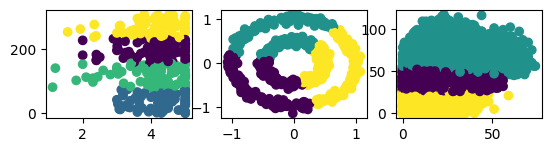

In [237]:
count = 1

kmeansHR = cluster.KMeans(n_clusters=4, n_init=10, random_state=42)
kmeansHR.fit(hrXY)

plt.subplot(3, 3, count)
plt.scatter(hrX, hrY, c=kmeansHR.labels_)
count+=1

kmeansCircles = cluster.KMeans(n_clusters=3, n_init=10, random_state=42)
kmeansCircles.fit(circlesX)

plt.subplot(3, 3, count)
plt.scatter(circlesX[:,0], circlesX[:,1], c=kmeansCircles.labels_)
count+=1

kmeansDia = cluster.KMeans(n_clusters=3)
kmeansDia.fit(diaXY)

plt.subplot(3, 3, count)
plt.scatter(diaX, diaY, c=kmeansDia.labels_)
count+=1

plt.show()
